In [1]:
import pandas as pd
import numpy as np
import dateutil


In [2]:
df = pd.read_csv('crime.csv')

c:\users\agraw\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
df['date'] = pd.DatetimeIndex(df['Date']).date
df['month'] = pd.DatetimeIndex(df['Date']).month

In [5]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,date,month
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,2012-12-31,12
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,2012-12-31,12
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,2012-12-31,12
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,2012-12-31,12
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,2012-12-31,12


# What is the Month and Year of the median date in our dataset?

In [6]:
df['month'].median(),df['Year'].median()
#May 2006

(7.0, 2006.0)

# In which month did the lowest motor vehicle thefts occur? 

In [7]:
df.groupby('month').Beat.count().sort_values()
#February

month
2     13511
4     15280
3     15758
6     16002
5     16035
1     16047
9     16060
11    16063
12    16426
8     16572
7     16801
10    17086
Name: Beat, dtype: int64

# On which weekday did most motor vehicle thefts occur?

In [8]:
df.groupby('date').Beat.sum().sort_values()

date
2009-05-19     17941
2011-02-02     18415
2009-03-30     19328
2011-09-20     19783
2012-04-01     20615
2010-03-03     20842
2009-05-27     21277
2006-03-08     21720
2009-02-01     22022
2008-01-22     22617
2010-02-24     22970
2008-11-18     23163
2009-03-29     23366
2009-05-21     24029
2007-12-07     24266
2012-04-25     24516
2006-12-30     24703
2011-02-01     24871
2009-07-25     25193
2009-01-13     25341
2009-11-26     25688
2012-09-18     25805
2009-03-23     25807
2004-02-03     25854
2010-02-07     25938
2009-06-09     26019
2008-02-06     26269
2008-02-03     26326
2010-02-09     26556
2006-03-24     26564
               ...  
2001-12-07     99260
2001-07-16     99319
2001-07-01     99502
2001-10-19    100100
2001-10-17    100126
2001-10-18    100149
2001-10-10    100606
2001-10-08    100980
2001-09-22    101245
2001-11-03    101826
2001-12-15    101949
2002-10-26    102061
2001-07-29    102096
2001-11-24    102495
2001-07-20    103343
2001-07-28    104721
2001-10-

In [9]:
import datetime 
import calendar 

res = datetime.datetime.strptime('12 10 2001', '%d %m %Y').weekday() 
calendar.day_name[res]

'Friday'

# Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? *

In [10]:
df.groupby('month').Arrest.value_counts().sort_values()
#January

month  Arrest
5      True       1187
6      True       1230
2      True       1238
9      True       1248
4      True       1252
11     True       1256
3      True       1298
7      True       1324
8      True       1329
10     True       1342
12     True       1397
1      True       1435
2      False     12273
4      False     14028
3      False     14460
1      False     14612
6      False     14772
11     False     14807
9      False     14812
5      False     14848
12     False     15029
8      False     15243
7      False     15477
10     False     15744
Name: Arrest, dtype: int64

# plot year graph

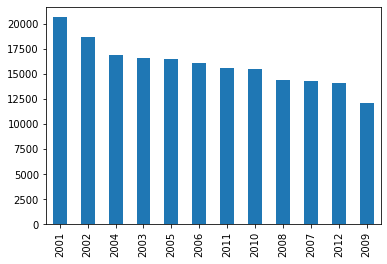

In [11]:
%matplotlib inline
df['Year'].value_counts().plot(kind='bar')

# Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? *

In [12]:
#first half

# For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [13]:
df.groupby('Year').Arrest.value_counts(normalize=True)
#0.10

Year  Arrest
2001  False     0.895883
      True      0.104117
2002  False     0.887218
      True      0.112782
2003  False     0.892057
      True      0.107943
2004  False     0.899597
      True      0.100403
2005  False     0.907304
      True      0.092696
2006  False     0.919120
      True      0.080880
2007  False     0.915126
      True      0.084874
2008  False     0.929387
      True      0.070613
2009  False     0.930961
      True      0.069039
2010  False     0.954765
      True      0.045235
2011  False     0.960031
      True      0.039969
2012  False     0.960971
      True      0.039029
Name: Arrest, dtype: float64

# For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [14]:
df.groupby('Year').Arrest.value_counts(normalize=True)
#0.08

Year  Arrest
2001  False     0.895883
      True      0.104117
2002  False     0.887218
      True      0.112782
2003  False     0.892057
      True      0.107943
2004  False     0.899597
      True      0.100403
2005  False     0.907304
      True      0.092696
2006  False     0.919120
      True      0.080880
2007  False     0.915126
      True      0.084874
2008  False     0.929387
      True      0.070613
2009  False     0.930961
      True      0.069039
2010  False     0.954765
      True      0.045235
2011  False     0.960031
      True      0.039969
2012  False     0.960971
      True      0.039029
Name: Arrest, dtype: float64

# Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?

In [15]:
df.groupby('LocationDescription').Arrest.count().sort_values()[-6:]

LocationDescription
DRIVEWAY - RESIDENTIAL              1675
GAS STATION                         2111
ALLEY                               2308
OTHER                               4573
PARKING LOT/GARAGE(NON.RESID.)     14852
STREET                            156564
Name: Arrest, dtype: int64

In [16]:
#STREET , PARKING LOT/GARAGE,  ALLEY, GAS STATION, DRIVEWAY - RESIDENTIAL,  

# On which day of the week do the most motor vehicle thefts at gas stations happen?

In [152]:
df[df.LocationDescription=='GAS STATION'].groupby('Beat').max()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Year,date,month
Beat,,,,,,,,,
122,70340,6072901,2/12/08 22:19,GAS STATION,False,False,2008,2008-02-12,2
123,190297,1354105,1/28/01 17:15,GAS STATION,True,False,2001,2001-01-28,1
131,189821,8801262,9/15/03 2:13,GAS STATION,False,False,2012,2012-09-13,11
132,184250,8480245,8/12/04 10:43,GAS STATION,True,False,2012,2012-02-13,12
211,134329,8777498,8/29/12 1:00,GAS STATION,False,False,2012,2012-08-29,8
212,132007,4480177,5/4/04 5:00,GAS STATION,True,False,2005,2005-12-02,12
213,123457,8255402,9/18/04 14:00,GAS STATION,False,False,2011,2011-08-27,11
214,154281,2455954,11/15/02 17:16,GAS STATION,False,False,2002,2002-11-15,11
221,191281,7418064,9/13/03 19:45,GAS STATION,True,False,2010,2010-03-19,11


In [155]:
import datetime 
import calendar 

res = datetime.datetime.strptime('06 08 2011', '%d %m %Y').weekday() 
calendar.day_name[res]

'Saturday'

# Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [51]:
df[df.LocationDescription.isin(['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL'])].shape[0]

177510